1. 삼국지 3 장수 데이터를 class 별로 그림을 그리시오 (sam3_testset)
2. 위의 내용을 바탕으로 무작위로 골라진 삼국지 3 장수 10명의 class를 예측해보시오


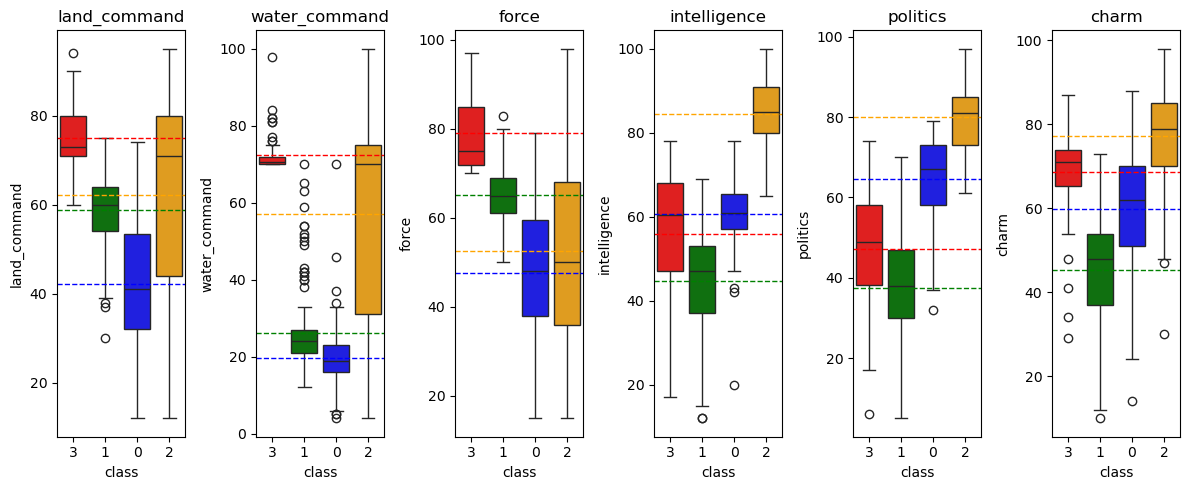

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

train = pd.read_excel('week8_sam3_testset.xlsx')
test = pd.read_excel('week8_sam3_prediction.xlsx')

features = ['land_command', 'water_command', 'force', 'intelligence', 'politics', 'charm']

palette = {'0': 'blue', '1': 'green', '2': 'orange', '3': 'red'}

train['class'] = train['class'].astype(str)

plt.figure(figsize=(12, 5))
for i, feature in enumerate(features):
    plt.subplot(1, 6, i+1) 
    ax = sns.boxplot(x='class', y=feature, data=train, hue='class', palette=palette)
    plt.title(f'{feature}')
    means = train.groupby('class')[feature].mean()
    
    for j, class_label in enumerate(means.index):
        plt.axhline(means[class_label], color=palette[class_label], linestyle='--', linewidth=1)

plt.tight_layout()
plt.show()

In [2]:
train.isnull().sum()

land_command     0
water_command    0
force            0
intelligence     0
politics         0
charm            0
class            0
dtype: int64

In [3]:
test.isnull().sum()

land_command      0
water_command     0
force             0
intelligence      0
politics          0
charm             0
class            10
dtype: int64

In [4]:
X = train.drop('class', axis=1)
y = train['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tpot = TPOTClassifier(generations=5, population_size=20, verbosity=2, random_state=42)
tpot.fit(X_train, y_train)

y_pred = tpot.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print(tpot.fitted_pipeline_)

test_data = test.copy()
X_new = test_data.drop('class', axis=1)
test_data['predicted_class'] = tpot.predict(X_new)

print(test_data)

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9282875511396844

Generation 2 - Current best internal CV score: 0.9315020455873759

Generation 3 - Current best internal CV score: 0.9418468731735826

Generation 4 - Current best internal CV score: 0.9554646405610754

Generation 5 - Current best internal CV score: 0.9554646405610754

Best pipeline: GradientBoostingClassifier(ZeroCount(input_matrix), learning_rate=0.1, max_depth=8, max_features=0.35000000000000003, min_samples_leaf=10, min_samples_split=8, n_estimators=100, subsample=0.6000000000000001)
Accuracy: 0.97
Pipeline(steps=[('zerocount', ZeroCount()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(max_depth=8,
                                            max_features=0.35000000000000003,
                                            min_samples_leaf=10,
                                            min_samples_split=8,
                                            random_state=42,
         